<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/Copy_of_CKD_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all libraries and data needed for this exercise
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
CKData = pd.read_excel('CKD_DATA.xlsx')
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)



In [ ]:
#viewing the head of the data set
CKData

,YEAR,CATEGORY_CODE,AGE,GENDER,RACE,AGE AT BIOPSY,ONSET TO BIOPSY TIME,M,E,S,...,L_MAP.1,L_CRETININE,L_eGFR,L_HEMATURIA,L_PROTEINURIA,L_UPCR,Unnamed: 104,OUTCOME,FUT,Unnamed: 107
0,2012,12305,40,FEMALE,MELAYU,30,30,1,0.0,1,...,110.0,803,5,-,-,0.67,NaN,ESRD,120,NaN
1,2012,4292,38,FEMALE,MELAYU,28,36,1,0.0,1,...,137.0,417,11,TRACE,1+,0.08,NaN,50PERC,60,NaN
2,2012,3213,38,FEMALE,MELAYU,27,9,1,NaN,1,...,146.0,59,120,1+,0,0.09,NaN,NO,48,NaN
3,2012,10911,41,FEMALE,MELAYU,31,10,0,1.0,1,...,131.0,70,96,1+,TRACE,0.02,NaN,NO,120,NaN
4,2012,7084,34,MALE,MELAYU,24,5,0,1.0,1,...,121.0,91,98,TRACE,4+,0.31,NaN,NO,120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020,3464,34,MALE,MELAYU,32,12,1,0.0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,21,NaN
77,2017,4265,31,FEMALE,MELAYU,25,40,1,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESRD,10,NaN
78,2019,255,38,FEMALE,MELAYU,34,44,1,0.0,1,...,116.0,95,NaN,NEG,2+,0.26,NaN,NO,18,NaN
79,2019,1996,24,FEMALE,MELAYU,21,12,1,0.0,1,...,89.0,65,NaN,1+,NEG,0.01,NaN,NO,43,NaN


In [ ]:
#SELECTING THE NEEDED COLUMNS FOR THE ANALYSIS
df1 = CKData[['AGE', 'GENDER', 'B_PROTEIN', 'B_ALBUMIN',	'B_CHOLESTEROL',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC',
                             'NEUTRO',	'LYMPHO',	'NLR',	'B_SBP',	'B_DBP',	'B_PP', 'B_MAP',	'HEMATURIA',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS',	'B_AZATHIOPRINE', 'OUTCOME']]

In [ ]:
#showing last 10 observations in the data newly created data column called df1
df1.tail(10)

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_MAP,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,OUTCOME
71,24,FEMALE,72.0,35,5.76,11.7,256,12.00,8.59,2.63,...,106.0,2+,121,55,0.29,1,0,0,0,NO
72,23,MALE,66.0,36,4.76,15.7,277,8.71,4.40,2.82,...,91.0,2+,93,103,0.09,0,1,0,0,NO
73,37,MALE,NaN,28,6.19,14.3,336,15.80,10.83,3.84,...,137.0,1+,378,18,0.76,1,0,0,0,ESRD
74,26,MALE,41.0,8,NaN,16.2,269,10.80,7.82,2.18,...,92.0,NEG,74,126,0.81,1,1,0,0,NO
75,26,FEMALE,71.0,34,5.76,12.1,295,8.00,5.18,1.70,...,82.0,3+,162,39,0.31,0,0,0,0,NO
76,34,MALE,NaN,39,5.08,15.4,262,9.50,5.22,3.52,...,107.0,2+,121,70,0.20,0,0,0,0,NO
77,31,FEMALE,54.0,22,9.65,10.9,388,7.00,4.13,2.04,...,119.0,2+,207,29,0.94,1,1,0,0,ESRD
78,38,FEMALE,73.0,33,6.12,12.7,273,8.30,4.04,3.32,...,101.0,NEG,90,74,0.17,1,0,0,0,NO
79,24,FEMALE,NaN,38,4.28,12.8,399,9.40,6.48,2.17,...,89.0,2+,67,115,0.18,1,0,0,0,NO
80,34,MALE,50.0,18,5.71,15.6,410,7.50,4.28,2.35,...,101.0,2+,132,65,1.05,1,0,0,0,NO


In [ ]:
#checking out the gender column
df1['GENDER'].describe()

count         81
unique         2
top       FEMALE
freq          60
Name: GENDER, dtype: object

In [ ]:
#checking out the haematuria column
df1['HEMATURIA'].describe()

count     81
unique     6
top       2+
freq      24
Name: HEMATURIA, dtype: object

In [ ]:
#checking out the outcome column
df1['OUTCOME'].describe()

count     81
unique     3
top       NO
freq      60
Name: OUTCOME, dtype: object

In [ ]:
#viewing all columns with empty observation
df1[df1.columns[df1.isna().any()]]

,B_PROTEIN,B_CHOLESTEROL,B_SBP,B_DBP,B_PP,B_MAP,B_UPCR
0,71.0,3.78,139.0,96.0,43.0,110.0,0.11
1,68.0,NaN,120.0,81.0,39.0,94.0,0.40
2,63.0,NaN,149.0,103.0,46.0,118.0,0.26
3,73.0,6.97,132.0,78.0,54.0,96.0,0.14
4,50.0,8.65,135.0,82.0,53.0,100.0,0.63
...,...,...,...,...,...,...,...
76,NaN,5.08,144.0,88.0,56.0,107.0,0.20
77,54.0,9.65,144.0,107.0,37.0,119.0,0.94
78,73.0,6.12,138.0,83.0,55.0,101.0,0.17
79,NaN,4.28,129.0,69.0,60.0,89.0,0.18


In [ ]:
#Filling out missing values with mean valuee of the column
df1[['B_PROTEIN',	'B_CHOLESTEROL',	'B_SBP',	'B_DBP',	'B_PP',	'B_MAP',	'B_UPCR']] = df1[['B_PROTEIN', 'B_CHOLESTEROL',	'B_SBP',
                                                                                        'B_DBP',	'B_PP',	'B_MAP','B_UPCR']].fillna(df1[['B_PROTEIN', 'B_CHOLESTEROL',	'B_SBP',
                                                                                                                                        'B_DBP', 'B_PP','B_MAP',	'B_UPCR']].mean())

 

In [ ]:
#checking if any column still has empty observation
df1.isnull().any()

AGE               False
GENDER            False
B_PROTEIN         False
B_ALBUMIN         False
B_CHOLESTEROL     False
B_HEMATOCRIT      False
B_PLATELET        False
WBC               False
NEUTRO            False
LYMPHO            False
NLR               False
B_SBP             False
B_DBP             False
B_PP              False
B_MAP             False
HEMATURIA         False
B_creatinine      False
B_eGFR            False
B_UPCR            False
B_ACE             False
B_STEROID         False
B_CYTOTOXICS      False
B_AZATHIOPRINE    False
OUTCOME           False
dtype: bool

In [ ]:
df1

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_MAP,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,OUTCOME
0,40,FEMALE,71.000000,35,3.780000,12.5,311,11.9,6.33,2.87,...,110.0,NEG,121,53,0.11,1,0,0,0,ESRD
1,38,FEMALE,68.000000,33,6.689219,11.7,413,10.7,7.74,1.91,...,94.0,2+,82,86,0.40,0,0,0,0,50PERC
2,38,FEMALE,63.000000,35,6.689219,12.1,433,13.1,10.90,1.40,...,118.0,NEG,74,98,0.26,1,1,0,0,NO
3,41,FEMALE,73.000000,39,6.970000,13.3,365,15.9,11.90,3.09,...,96.0,NEG,59,120,0.14,0,1,0,0,NO
4,34,MALE,50.000000,20,8.650000,13.2,310,7.3,3.97,2.52,...,100.0,NEG,76,124,0.63,0,0,1,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,MALE,62.639344,39,5.080000,15.4,262,9.5,5.22,3.52,...,107.0,2+,121,70,0.20,0,0,0,0,NO
77,31,FEMALE,54.000000,22,9.650000,10.9,388,7.0,4.13,2.04,...,119.0,2+,207,29,0.94,1,1,0,0,ESRD
78,38,FEMALE,73.000000,33,6.120000,12.7,273,8.3,4.04,3.32,...,101.0,NEG,90,74,0.17,1,0,0,0,NO
79,24,FEMALE,62.639344,38,4.280000,12.8,399,9.4,6.48,2.17,...,89.0,2+,67,115,0.18,1,0,0,0,NO


In [ ]:
#finding unique values in my data set

pd.unique(df1[['GENDER']].values.ravel())#array(['FEMALE', 'MALE'], dtype=object)

array(['FEMALE', 'MALE'], dtype=object)

In [ ]:

pd.unique(df1['OUTCOME'].values.ravel()) #array(['ESRD', '50PERC', 'NO'], dtype=object)

array(['ESRD', '50PERC', 'NO'], dtype=object)

In [ ]:
pd.unique(df1['HEMATURIA'].values.ravel()) #array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

In [ ]:
df1.dtypes


AGE                 int64
GENDER             object
B_PROTEIN         float64
B_ALBUMIN           int64
B_CHOLESTEROL     float64
B_HEMATOCRIT      float64
B_PLATELET          int64
WBC               float64
NEUTRO            float64
LYMPHO            float64
NLR               float64
B_SBP             float64
B_DBP             float64
B_PP              float64
B_MAP             float64
HEMATURIA          object
B_creatinine        int64
B_eGFR              int64
B_UPCR            float64
B_ACE               int64
B_STEROID           int64
B_CYTOTOXICS        int64
B_AZATHIOPRINE      int64
OUTCOME            object
dtype: object

In [ ]:
#removing empty spaces from the columns of gender, outcome snd hemturia
for col in ["GENDER", "OUTCOME", "HEMATURIA"]:
    df1[col] = df1[col].replace("\s+", " ", regex=True).str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1['OUTCOME_d'] = np.where(df1['OUTCOME'] == 'NO', 0, (np.where(df1['OUTCOME'] == '50PERC', 1, 2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['OUTCOME_d'].describe()

count    81.000000
mean      0.469136
std       0.822898
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: OUTCOME_d, dtype: float64

In [ ]:
conditions = [
    (df1['HEMATURIA'] == 'NEG'),
    (df1['HEMATURIA'] == 'TRACE'),
    (df1['HEMATURIA'] == '1+'),
    (df1['HEMATURIA'] == '2+'),
    (df1['HEMATURIA'] == '3+'),
    (df1['HEMATURIA'] == '5+'),
]

values = [0, 1, 2, 3, 4, 5]

df1['HEMATURIA_d'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
df1['HEMATURIA_d'].describe()

count    81.000000
mean      2.493827
std       1.388556
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: HEMATURIA_d, dtype: float64

In [ ]:
#changing the gender column to dummy variables where male =1 and female = 0
df1['GENDER_d'] = np.where(df1["GENDER"] == 'FEMALE', 0 ,1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['GENDER_d'].describe()

count    81.000000
mean      0.259259
std       0.440959
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: GENDER_d, dtype: float64

In [ ]:
#SELECTING THE NEWLY CREATED COLUMNS FOR THE ANALYSIS
df2 = df1[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',	'B_CHOLESTEROL',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC',
                             'NEUTRO',	'LYMPHO',	'NLR',	'B_SBP',	'B_DBP',	'B_PP', 'B_MAP',	'HEMATURIA_d',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS', 'OUTCOME_d']]

In [ ]:
df2.head()

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,OUTCOME_d
0,40,0,71.0,35,3.780000,12.5,311,11.9,6.33,2.87,...,43.0,110.0,0,121,53,0.11,1,0,0,2
1,38,0,68.0,33,6.689219,11.7,413,10.7,7.74,1.91,...,39.0,94.0,3,82,86,0.40,0,0,0,1
2,38,0,63.0,35,6.689219,12.1,433,13.1,10.90,1.40,...,46.0,118.0,0,74,98,0.26,1,1,0,0
3,41,0,73.0,39,6.970000,13.3,365,15.9,11.90,3.09,...,54.0,96.0,0,59,120,0.14,0,1,0,0
4,34,1,50.0,20,8.650000,13.2,310,7.3,3.97,2.52,...,53.0,100.0,0,76,124,0.63,0,0,1,0


In [ ]:
df2.describe()

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,OUTCOME_d
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,38.185185,0.259259,62.639344,30.074074,6.689219,12.322222,317.234568,9.551481,6.042346,2.446049,...,50.850000,98.850000,2.493827,130.925926,74.296296,0.397375,0.716049,0.259259,0.037037,0.469136
std,10.141636,0.440959,11.492424,7.575912,2.039109,1.414567,80.846347,3.401446,2.985217,0.711830,...,14.241752,14.821522,1.388556,86.176821,37.617963,0.269197,0.453723,0.440959,0.190029,0.822898
min,21.000000,0.000000,0.000000,6.000000,3.410000,9.600000,111.000000,4.500000,2.390000,0.960000,...,26.000000,69.000000,0.000000,37.000000,15.000000,0.020000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,60.000000,26.000000,5.590000,11.400000,269.000000,7.300000,4.190000,2.040000,...,40.000000,88.000000,2.000000,69.000000,39.000000,0.190000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,62.639344,33.000000,6.689219,12.200000,307.000000,8.800000,5.180000,2.380000,...,49.000000,97.000000,3.000000,97.000000,77.000000,0.310000,1.000000,0.000000,0.000000,0.000000
75%,44.000000,1.000000,71.000000,35.000000,7.190000,13.200000,368.000000,10.700000,6.620000,2.760000,...,58.000000,106.000000,4.000000,161.000000,107.000000,0.570000,1.000000,1.000000,0.000000,1.000000
max,70.000000,1.000000,83.000000,42.000000,13.390000,16.200000,689.000000,22.800000,17.840000,4.750000,...,100.000000,145.000000,5.000000,378.000000,136.000000,1.120000,1.000000,1.000000,1.000000,2.000000


Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES')

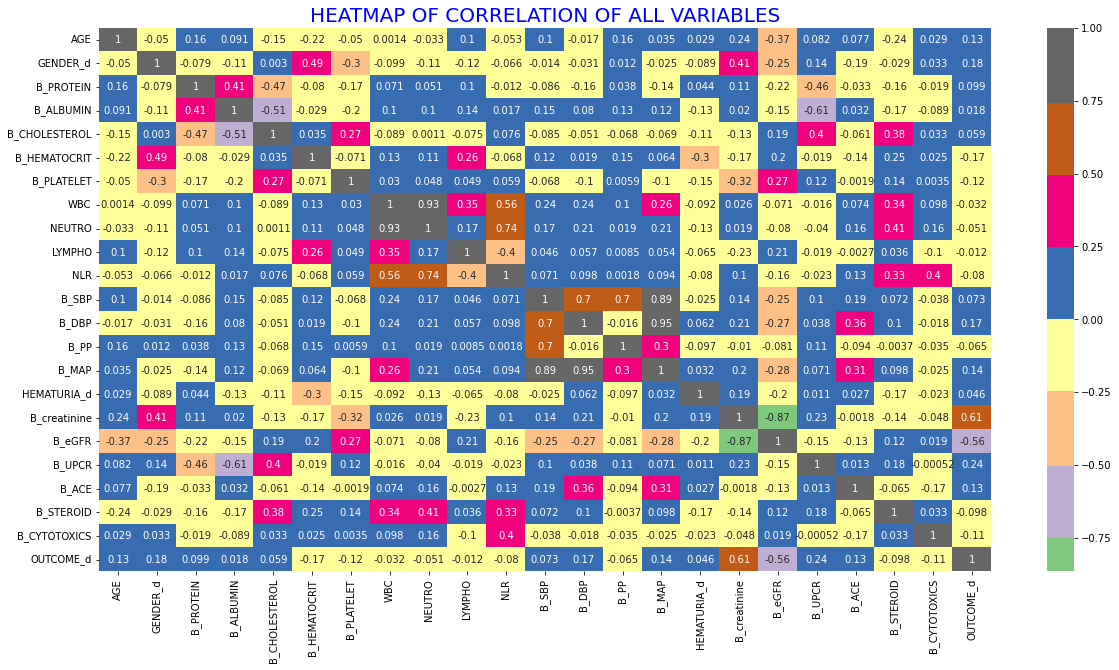

In [ ]:
#plotting the correlation of all variables 
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(), annot = True, center = 0, cmap = 'Accent')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES', color='b', size=20.0)


Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES')

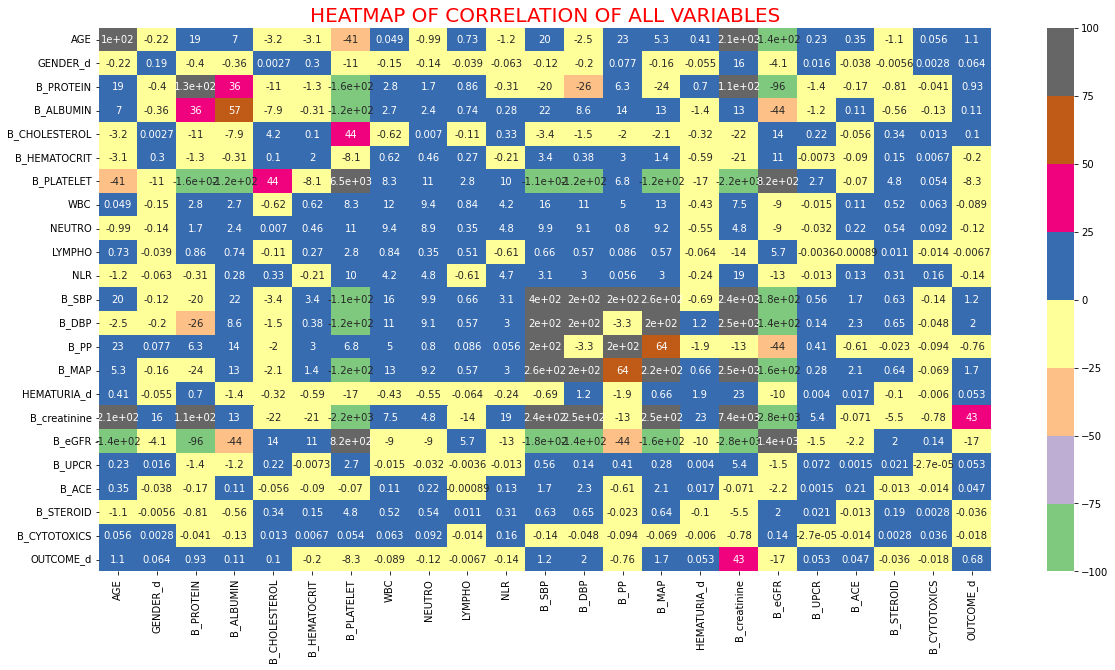

In [ ]:
#plotting the correlation of all variables 
plt.figure(figsize = (20,10))
sns.heatmap(df2.cov(), annot = True, center = 0, vmin = -100, vmax = 100, cmap = 'Accent')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES', color='r', size=20.0)